<a href="https://colab.research.google.com/github/suheyla2/cs-552-modern-nlp/blob/main/NLPtraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[My NLP notebook is here](https://docs.google.com/document/d/1GXubz-_nDUW9EFUERMyJSqRVClFCFefGHICwnapZ_9o/)

[CS 552 - EPFL Modern Natural Language Processing Course - Week1 exercise link](https://github.com/epfl-nlp/cs-552-modern-nlp/blob/main/Exercises/Week%201%20-%20Word%20Embeddings/Week-1.ipynb)

In [31]:
#!pip3 install pandas gensim numpy matplotlib seaborn scikit-learn tqdm torch torchmetrics


# imported libraries for this exercise
import pandas as pd
import numpy as np
from gensim.test.utils import common_texts
from gensim.utils import tokenize
from gensim.models import Word2Vec
import gensim.downloader
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchmetrics.classification import BinaryAccuracy
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

#instantiate and train model
w2v_model = Word2Vec(sentences=common_texts,
                     vector_size=10,
                     window=5,
                     min_count=1,
                     workers=4)

#dict with vocabulary frequencies
words = w2v_model.wv.key_to_index
words

# explore embeddings
vector = w2v_model.wv['computer']  # get numpy vector of a word
print('The vector length of the word is {}.'.format(len(vector)))

# print most similar words
sims = w2v_model.wv.most_similar('computer', topn=3)  # get other similar words
print(sims)



The vector length of the word is 10.


In [32]:
# print most similar words
sims = w2v_model.wv.most_similar('computer', topn=3)  # get other similar words
print(sims)

[('eps', 0.2914133667945862), ('trees', 0.05541810393333435), ('minors', 0.042647670954465866)]


In [35]:
# example solution for Wikipedia
from gensim.test.utils import datapath, get_tmpfile
from gensim.corpora import WikiCorpus, MmCorpus

path_to_wiki_dump = datapath("enwiki-latest-pages-articles1.xml-p000000010p000030302-shortened.bz2")
corpus_path = get_tmpfile("wiki-corpus.mm")

wiki = WikiCorpus(path_to_wiki_dump)  # create word->word_id mapping, ~8h on full wiki
MmCorpus.serialize(corpus_path, wiki)  # another 8h, creates a file in MatrixMarket format and mapping

wiki_sentences = list(wiki.get_texts())

In [36]:
wiki_sentences[:2]

[['anarchism',
  'is',
  'political',
  'philosophy',
  'that',
  'advocates',
  'self',
  'governed',
  'societies',
  'based',
  'on',
  'voluntary',
  'institutions',
  'these',
  'are',
  'often',
  'described',
  'as',
  'stateless',
  'societies',
  'although',
  'several',
  'authors',
  'have',
  'defined',
  'them',
  'more',
  'specifically',
  'as',
  'institutions',
  'based',
  'on',
  'non',
  'hierarchical',
  'free',
  'associations',
  'anarchism',
  'considers',
  'the',
  'state',
  'to',
  'be',
  'undesirable',
  'unnecessary',
  'and',
  'harmful',
  'while',
  'anti',
  'statism',
  'is',
  'central',
  'anarchism',
  'entails',
  'opposing',
  'authority',
  'or',
  'hierarchical',
  'organisation',
  'in',
  'the',
  'conduct',
  'of',
  'all',
  'human',
  'relations',
  'including',
  'but',
  'not',
  'limited',
  'to',
  'the',
  'state',
  'system',
  'anarchism',
  'draws',
  'on',
  'many',
  'currents',
  'of',
  'thought',
  'and',
  'strategy',
  'ana

In [39]:
w2v_wiki_model = Word2Vec(sentences=wiki_sentences,
                         vector_size=100,
                         window=5,
                         min_count=1,
                         workers=4)

In [38]:
# most similar
sims = w2v_wiki_model.wv.most_similar('government', topn=5)  # get other similar words
sims

[('area', 0.9947446584701538),
 ('budget', 0.9946349263191223),
 ('economy', 0.9938206672668457),
 ('province', 0.9931598901748657),
 ('azerbaijan', 0.9923586845397949)]

In [ ]:
w2v_wiki_model = Word2Vec(sentences=wiki_sentences,
                         vector_size=100,
                         window=5,
                         min_count=1,
                         workers=4, sg=1)

In [40]:
sims = w2v_wiki_model.wv.most_similar('government', topn=5)  # get other similar words
sims

[('federal', 0.9458716511726379),
 ('constitution', 0.9131118059158325),
 ('power', 0.9044914245605469),
 ('executive', 0.900863528251648),
 ('legislature', 0.8960346579551697)]

In [41]:
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# Download the "word2vec-google-news-300" embeddings
w2v_vectors = gensim.downloader.load('word2vec-google-news-300')

[=============-------------------------------------] 27.7% 460.7/1662.8MB downloaded

After converting our words in the corpus into vector of integers:
[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]
Contexts:
[[1, 3, 5, 1], [3, 4, 1, 6], [1, 7, 2, 1], [7, 8, 1, 9], [1, 10, 2, 1], [10, 11, 1, 12]]
[[ 0.02592318  0.02346039  0.04686128 -0.00717626  0.03756315  0.0284462
   0.02037139 -0.04906504 -0.02764924  0.03459975]
 [-0.01166461 -0.0382456  -0.02611086  0.03197532 -0.03651626  0.00396033
   0.03133042  0.00309294  0.03739414 -0.02450061]
 [-0.00802388 -0.01417427 -0.01860931  0.03675679 -0.0102482  -0.00874703
  -0.0162035  -0.0397468  -0.01874359  0.02333723]
 [ 0.0405442   0.04051724 -0.00898087  0.03208819  0.01758328 -0.02500998
  -0.02225567  0.03098546 -0.04035659 -0.04284214]
 [-0.03399219  0.02577254 -0.01085543 -0.01299273 -0.04448609 -0.01969756
   0.03829337  0.02739194 -0.02976636 -0.02136673]
 [-0.0191371  -0.02626606  0.03694579 -0.03510354  0.01940804 -0.01495824
  -0.02298627  0.01835673 -0.01282216  0.01386048]
 [-0.03972543  0.00458

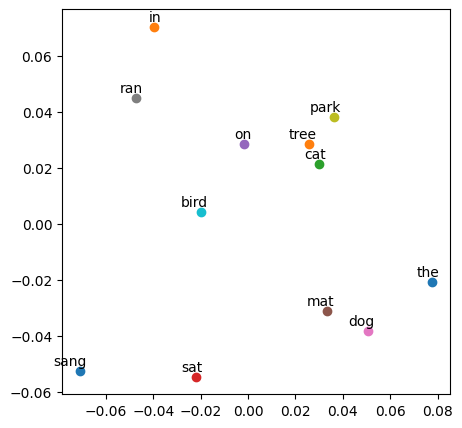

In [25]:
#!pip3 install numpy matplotlib sklearn tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,\
    Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the corpus
corpus = ['The cat sat on the mat',
          'The dog ran in the park',
          'The bird sang in the tree']

# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in the corpus \
into vector of integers:")
print(sequences)

# Define the parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2

# Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
	for i in range(window_size, len(sequence) - window_size):
		context = sequence[i - window_size:i] +\
			sequence[i + 1:i + window_size + 1]
		target = sequence[i]
		contexts.append(context)
		targets.append(target)
print("Contexts:")
print(contexts)

# Convert the contexts and targets to numpy arrays
X = np.array(contexts)

# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
					output_dim=embedding_size,
					input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))
model.save_weights('cbow_weights.h5')


# Load the pre-trained weights
model.load_weights('cbow_weights.h5')


# Get the word embeddings
embeddings = model.get_weights()[0]
print(embeddings)

# Perform PCA to reduce the dimensionality
# of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i, word in enumerate(tokenizer.word_index.keys()):
	x, y = reduced_embeddings[i]
	plt.scatter(x, y)
	plt.annotate(word, xy=(x, y), xytext=(5, 2),
				textcoords='offset points',
				ha='right', va='bottom')
plt.show()





